# 데이터 불러오기

In [1]:
import yfinance as yf
TSLA = yf.download("TSLA", start="2019-01-01", end="2023-03-31")
TSLA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


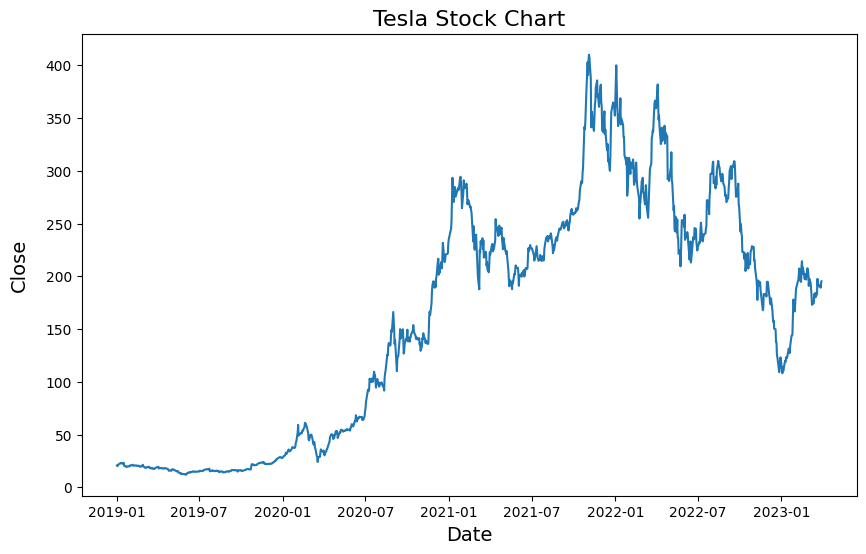

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=TSLA, x=TSLA.index, y=TSLA.Close, ax=ax)
ax.set_title('Tesla Stock Chart', size = 16)
ax.set_xlabel('Date', size = 14)
ax.set_ylabel('Close', size = 14, labelpad=12)
ax.yaxis.set_major_formatter(formatter)

plt.savefig('output/scikit-learn01.png', dpi=200)
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings("ignore")

def tsplot(y, lags=None, figsize=(10, 6), tickerName = "stock", outputname = 'output/scikit-learn.png'):
    """시계열 그래프, ACF, PACF, Dickey–Fuller test 계산한다. 
    Parameters:
        y : 시계열 데이터
        lags : ACF, PACF, Dickey-Fuller 검정
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    p_value = np.round(sm.tsa.stattools.adfuller(y)[1], 2)

    fig = plt.figure(figsize=figsize)
    layout = (0.5, 0.5)

    spec = fig.add_gridspec(nrows=2, ncols=2, height_ratios=layout, width_ratios=layout)

    ### 2. setting axes
    axs = {}
    for i in range(len(layout)*len(layout)):
        if i >= 2:
            axs[i] = fig.add_subplot(spec[i//len(layout), i%len(layout)])
            # axs[i].text(0.5, 0.5, f"axs[{i}]", fontdict={"horizontalalignment":"center", "color":"gray"})
        else:
            axs[i] = fig.add_subplot(spec[i//len(layout), :])
            # axs[i].text(0.5, 0.5, f"axs[{i}]", fontdict={"horizontalalignment":"center", "color":"gray"})

    fig.delaxes(axs[0])

    axs[1].plot(y)
    axs[1].set_title(f'{tickerName} Stock Time Series Analysis Plots\n Dickey-Fuller: p={p_value}')

    smt.graphics.plot_acf(y, lags=lags, ax=axs[2])
    axs[2].set_ylim(-1.5, 1.5)
    axs[2].set_title('Autocorrelation')
    smt.graphics.plot_pacf(y, lags=lags, ax=axs[3])
    
    axs[3].set_ylim(-1.5, 1.5)
    axs[3].set_title('Partial Autocorrelation')

    fig.tight_layout()
    plt.savefig(outputname, dpi=200)
    plt.show()

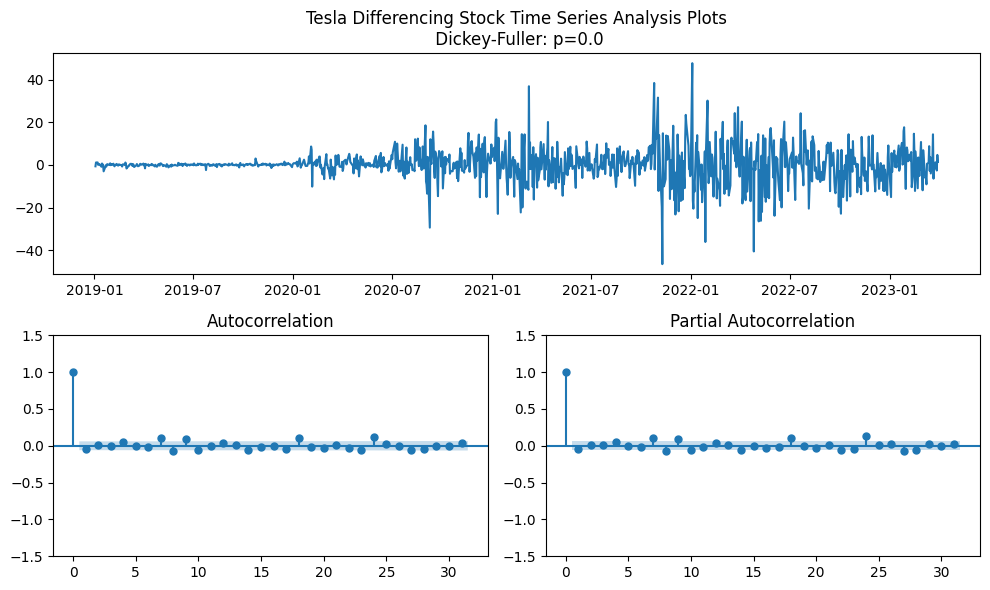

In [4]:
ts_sun_diff = (TSLA.Close - TSLA.Close.shift(1)).dropna()
tsplot(ts_sun_diff, tickerName = "Tesla Differencing", outputname = 'output/scikit-learn03.png')

In [49]:
test_len = int(len(TSLA.Close) * 0.2)
TSLA_train, TSLA_test = TSLA.Close.iloc[:-test_len], TSLA.Close.iloc[-test_len:]
TSLA_train.shape, TSLA_test.shape

((856,), (213,))

In [50]:
TSLA_train[:5]

Date
2019-01-02    20.674667
2019-01-03    20.024000
2019-01-04    21.179333
2019-01-07    22.330667
2019-01-08    22.356667
Name: Close, dtype: float64

In [51]:
TSLA_test[:5]

Date
2022-05-25    219.600006
2022-05-26    235.910004
2022-05-27    253.210007
2022-05-31    252.753326
2022-06-01    246.789993
Name: Close, dtype: float64

In [52]:
from sktime.forecasting.arima import AutoARIMA

train_dates = TSLA_train.index
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
TSLA_train.index = TSLA_train.index.astype(int)
forecaster.fit(TSLA_train)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  856
Model:               SARIMAX(9, 1, 2)   Log Likelihood               -2921.474
Date:                Mon, 17 Apr 2023   AIC                           5866.948
Time:                        23:23:48   BIC                           5923.961
Sample:                             0   HQIC                          5888.781
                                - 856                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0291      0.045    -22.827      0.000      -1.117      -0.941
ar.L2         -0.8970      0.047    -19.160      0.000      -0.989      -0.805
ar.L3         -0.0072      0.041     -0.175      0.861      -0.087       0.073
ar.L4          0.0549      0.040      1.361      0.173      -0.024       0.134
ar.L5          0.0499      0.041      1.216      0.224      -0.031       0.130
ar.L6          0.0058      0.039      0.150      0.881      -0.070       0.082
ar.L7          0.1026      0.033      3.147      0.002       0.039       0.167
ar.L8          0.0382      0.029      1.335      0.182      -0.018       0.094
ar.L9          0.1210      0.028      4.396      0.000       0.067       0.175
ma.L1          1.0204      0.036     28.464      0.000       0.950       1.091
ma.L2          0.8981      0.034     26.791      0.000       0.832       0.964
sigma2        54.3502      1.351     40.240      0.000      51.703      56.997
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1817.97
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              79.89   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

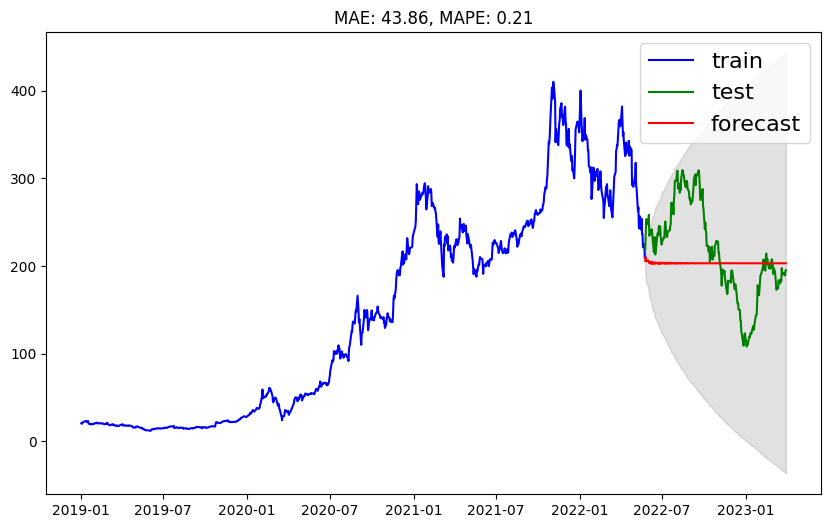

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

fh = np.arange(test_len) + 1
forecast = forecaster.predict(fh=fh)
coverage = 0.95
forecast_int = forecaster.predict_interval(fh=fh, coverage=coverage)['Coverage'][coverage]

TSLA_train.index = train_dates
forecast.index = TSLA_test.index

mae = np.round(mean_absolute_error(TSLA_test, forecast), 2)
mape = np.round(mean_absolute_percentage_error(TSLA_test, forecast), 2)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TSLA_train.index, TSLA_train.values, label="train", color = 'b')
ax.plot(TSLA_test.index, TSLA_test.values, label="test", color = 'g')
ax.plot(forecast.index, forecast.values, label="forecast", color = 'r')
ax.fill_between(TSLA_test.index, 
                forecast_int["lower"],
                forecast_int["upper"],
                alpha=0.2, 
                color="dimgray")
ax.set_title(f'MAE: {mae}, MAPE: {mape}')
plt.legend(prop={'size':16})
plt.savefig("output/scikit-learn04.png", dpi=200)
plt.show()